In [38]:
# Import dependencies
import pandas as pd
import random as random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from citipy import citipy
import requests
import json


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# Kristina's code starts here
storm_data = pd.read_csv('Resources/clean_storm_event_data.csv')
storm_data = storm_data.drop(columns = 'Unnamed: 0')
storm_data

,Year,Month,Day,State,Event Type
0,1950,June,15,MINNESOTA,Tornado
1,1951,June,19,MINNESOTA,Tornado
2,1951,June,19,MINNESOTA,Tornado
3,1951,June,25,MINNESOTA,Tornado
4,1951,July,20,MINNESOTA,Tornado
...,...,...,...,...,...
43360,2020,February,8,MINNESOTA,Winter Weather
43361,2020,February,8,MINNESOTA,Winter Weather
43362,2020,February,12,MINNESOTA,Winter Weather
43363,2020,February,12,MINNESOTA,Extreme Cold/Wind Chill


In [4]:
# Kristina's code ends here

In [5]:
# Jeff's code starts here
temp_data_df = pd.read_csv('Resources/clean_temp_data.csv')
temp_data_df


,Unnamed: 0,Name,Date,Total Monthly Precipitation,Total Montly Snowfall (mm),Avg Monthly Temp,Monthly Mean Max Temp,Monthly Mean Min Temp
0,0,"ADA, MN US",1950-01,1.30,NaN,NaN,NaN,-16.4
1,1,"ADA, MN US",1950-02,0.10,1.0,7.1,19.1,-5.0
2,2,"ADA, MN US",1950-03,1.14,0.3,19.5,29.5,9.4
3,3,"ADA, MN US",1950-04,NaN,NaN,32.8,41.0,24.7
4,4,"ADA, MN US",1950-05,5.21,0.0,51.8,61.6,42.0
...,...,...,...,...,...,...,...,...
7025,2502,"COLLEGEVILLE ST. JOHN S, MN US",2019-09,8.67,0.0,62.6,71.6,53.6
7026,2503,"COLLEGEVILLE ST. JOHN S, MN US",2019-10,4.17,0.0,44.6,53.1,36.2
7027,2504,"COLLEGEVILLE ST. JOHN S, MN US",2019-11,1.60,14.1,28.1,34.1,22.1
7028,2505,"COLLEGEVILLE ST. JOHN S, MN US",2019-12,2.12,12.0,18.6,26.1,11.2


In [47]:
# Jeff's code ends here
temp_data_df["Name"].unique()
temp_data_df.dropna(inplace = True)
temp_data_df

#code below combines all locations into one average value for month and year
list = temp_data_df["Name"].unique()
temp_comb_df = temp_data_df.groupby(["Date"])["Total Monthly Precipitation", "Total Montly Snowfall (mm)",
                                             "Avg Monthly Temp", "Monthly Mean Max Temp",
                                              "Monthly Mean Min Temp"].mean().reset_index()

#Data is string Year-Month (month two digits 01-12).  This splits into two fields
temp_comb_df["Month"] = temp_comb_df["Date"].str.split("-").str[1].astype(int)
temp_comb_df["Year"] = temp_comb_df["Date"].str.split("-").str[0].astype(int)

col_list = temp_comb_df.columns.tolist()
Season_data_df = pd.DataFrame(columns = col_list)

#combining months to form seasons: Winter (Dec-Feb), Fall(Mar-May), Summer(June-Aug), Fall(Sept-Nov)
for i in temp_comb_df["Year"].unique():
    if i!= 1950 and i!= 2020: #ignore 1950 because don't have dec 1949 and don't have all 2020
        
        #in dataframe the "month" represents the season: 2=winter, 4 = spring, 7 = summer, 10=fall
        winter_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(1,2)))|\
                                         ((temp_comb_df["Year"]==(i-1)) & (temp_comb_df["Month"]==12))].mean()
        winter_data["Year"]=winter_data["Year"].astype(int)+1 # extra 1 because rounds down to year previous
        winter_data["Month"] = 1 #would be 5 otherwise (mean(12,1,2))
        spring_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(3,5)))].mean()
        spring_data["Year"]=spring_data["Year"].astype(int)
        summer_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(6,8)))].mean()
        summer_data["Year"]=summer_data["Year"].astype(int)
        fall_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(9,11)))].mean() 
        fall_data["Year"]=fall_data["Year"].astype(int)
        
        frames = [winter_data, spring_data, summer_data, fall_data]
        Season_data_df = Season_data_df.append(frames, ignore_index = True)
        
Season_data_df["Temp Swing"] = Season_data_df["Monthly Mean Max Temp"]-Season_data_df["Monthly Mean Min Temp"]
Season_data_df.drop(columns=["Date"], inplace = True)


In [48]:
Season_data_df

,Total Monthly Precipitation,Total Montly Snowfall (mm),Avg Monthly Temp,Monthly Mean Max Temp,Monthly Mean Min Temp,Month,Year
0,0.710476,8.096296,7.851323,17.735979,-2.006878,1.0,1951.0
1,1.875463,9.306944,37.860185,48.611574,27.108333,4.0,1951.0
2,3.767778,0.000000,63.918519,75.203704,52.640741,7.0,1951.0
3,1.770509,3.470833,39.780093,49.213426,30.370833,10.0,1951.0
4,0.979722,10.074537,11.093519,20.641204,1.537963,1.0,1952.0
...,...,...,...,...,...,...,...
271,3.013333,1.933333,42.022222,50.200000,33.866667,10.0,2018.0
272,1.357778,16.577778,12.000000,20.688889,3.344444,1.0,2019.0
273,3.455556,8.244444,38.588889,48.933333,28.222222,4.0,2019.0
274,3.862222,0.000000,67.608333,78.461111,56.766667,7.0,2019.0


Text(0.5, 1.0, 'Temp Swing versus Latitude /n for Northern Hemisphere')

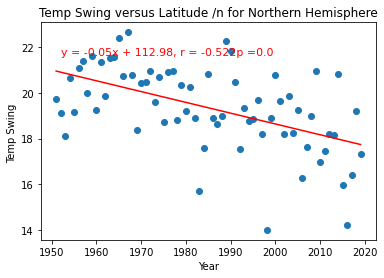

In [51]:
variable = "Temp Swing" #pick variable to look at

#defining seasons by value in month column
winter = 1
spring = 4
summer = 7
fall = 10

#specifying data for plotting based on variable and season
x_axis = Season_data_df[Season_data_df["Month"]==winter]["Year"]
y_axis = Season_data_df[Season_data_df["Month"]==winter][variable]
plt.scatter(x_axis,y_axis)

(slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x_axis,y_axis)
regress_values_N = x_axis * slope_N + intercept_N
line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,3))\
                + "p ="+str(round(pvalue_N,3))
max_y = y_axis.max()
min_x = x_axis.min()
plt.plot(x_axis,regress_values_N,"r-")
plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
plt.xlabel("Year")
plt.ylabel(f"{variable} ")
plt.title(f"{variable} versus Latitude /n for Northern Hemisphere")

In [ ]:
# Faduma's code starts here

In [ ]:
# Faduma's code ends here

In [ ]:
# Emily's code starts here

In [ ]:
# Emily's code ends here